In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image, ImageChops, ImageEnhance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

In [2]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization


In [3]:
wday_off = pd.read_csv('wday_off.csv')
wday_peak = pd.read_csv('wday_peak.csv')
wend_off = pd.read_csv('wend_off.csv')
wend_peak = pd.read_csv('wend_peak.csv')

In [4]:
wday_off

Link  Node_Start  Longitude_Start  Latitude_Start  Node_End  \
0        0           0       103.946006       30.750660        16   
1        1           0       103.946006       30.750660        48   
2        2           0       103.946006       30.750660        64   
3        3           1       104.062539       30.739077       311   
4        4           1       104.062539       30.739077      1288   
...    ...         ...              ...             ...       ...   
5938  5938        1900       104.029570       30.670992      1729   
5939  5939        1901       104.025686       30.626472      1233   
5940  5940        1901       104.025686       30.626472      1565   
5941  5941        1901       104.025686       30.626472      1658   
5942  5942        1901       104.025686       30.626472      1833   

      Longitude_End  Latitude_End       Length  Unnamed: 8       Data1  ...  \
0        103.952551     30.756752   921.041014         NaN   89.587892  ...   
1        103.956494     30.745080  1179.207157         NaN  121.986947  ...   
2        103.941276     30.754493   620.905375         NaN   41.285580  ...   
3        104.060024     30.742693   467.552294         NaN   37.796143  ...   
4        104.062071     30.732501   730.287581         NaN   60.548947  ...   
...             ...           ...          ...         ...         ...  ...   
5938     104.031714     30.670676   208.333343         NaN   15.136227  ...   
5939     104.023241     30.622808   468.731933         NaN   40.644760  ...   
5940     104.023113     30.627839   289.473210         NaN   50.246073  ...   
5941     104.028963     30.624882   360.123488         NaN   36.935304  ...   
5942     104.026919     30.628522   256.113864         NaN   26.720084  ...   

          Data41      Data42      Data43      Data44      Data45      Data46  \
0      73.957197   88.184778   72.003206   88.184778   73.852526   75.069991   
1     113.506571  113.506571  140.895778  142.619070  139.213634  146.195291   
2      59.448387   59.448387   59.448387   59.448387   44.218780   46.230804   
3      38.472874   46.950858   50.244426   49.761663   51.894196   60.764919   
4      80.810511   80.810511   76.872377   77.360119   76.872377   75.819331   
...          ...         ...         ...         ...         ...         ...   
5938   18.137848   21.428572   21.783739   20.197487   16.406892   20.856508   
5939   47.036515   43.083732   48.099051   43.433164   50.507828   49.743827   
5940   37.986764   39.523523   39.523523   37.986764   37.986764   37.986764   
5941   49.169831   40.066719   40.262253   40.262253   40.262253   40.262253   
5942   33.190697   32.782575   33.609110   26.854658   27.798857   35.847975   

          Data47      Data48      Data49      Data50  
0      72.673921   77.629445   77.629445   83.310242  
1     132.868412  162.493618  162.493618  209.120481  
2      45.202414   43.339978   43.774969   45.202414  
3      50.244426   46.755229   32.152593   32.152593  
4      75.222755   75.222755   75.222755   74.794745  
...          ...         ...         ...         ...  
5938   26.785715   27.444883   19.788919   19.788919  
5939   56.310399   42.064937   40.425000   38.736879  
5940   37.986764   37.986764   37.986764   44.496309  
5941   40.513892   36.142025   38.186879   38.186879  
5942   27.421728   26.417045   73.175390   73.175390  

[5943 rows x 59 columns]

In [5]:
wday_peak

Link  Node_Start  Longitude_Start  Latitude_Start  Node_End  \
0        0           0       103.946006       30.750660        16   
1        1           0       103.946006       30.750660        48   
2        2           0       103.946006       30.750660        64   
3        3           1       104.062539       30.739077       311   
4        4           1       104.062539       30.739077      1288   
...    ...         ...              ...             ...       ...   
5938  5938        1900       104.029570       30.670992      1729   
5939  5939        1901       104.025686       30.626472      1233   
5940  5940        1901       104.025686       30.626472      1565   
5941  5941        1901       104.025686       30.626472      1658   
5942  5942        1901       104.025686       30.626472      1833   

      Longitude_End  Latitude_End       Length  Unnamed: 8       Data1  ...  \
0        103.952551     30.756752   921.041014         NaN   93.401342  ...   
1        103.956494     30.745080  1179.207157         NaN  151.747838  ...   
2        103.941276     30.754493   620.905375         NaN   67.420164  ...   
3        104.060024     30.742693   467.552294         NaN   45.788582  ...   
4        104.062071     30.732501   730.287581         NaN  147.692628  ...   
...             ...           ...          ...         ...         ...  ...   
5938     104.031714     30.670676   208.333343         NaN   52.763821  ...   
5939     104.023241     30.622808   468.731933         NaN   46.294512  ...   
5940     104.023113     30.627839   289.473210         NaN   56.052186  ...   
5941     104.028963     30.624882   360.123488         NaN   90.660458  ...   
5942     104.026919     30.628522   256.113864         NaN   30.555424  ...   

          Data41      Data42      Data43      Data44      Data45      Data46  \
0      74.129457   74.119060   74.124259   74.121659   74.122959   74.122309   
1     167.600790  167.600853  167.600822  167.600822  167.600822  119.919372   
2      87.069450  111.902846   96.288095   52.718381   68.133314   59.442741   
3     101.498789  101.498789  101.498789  101.498789  101.498789  101.498789   
4     100.583743  100.579643  100.581693  100.580668  100.581180  100.580924   
...          ...         ...         ...         ...         ...         ...   
5938   55.705607   39.874337   26.533020   34.653467   33.088237   49.019610   
5939   60.276729   60.247962   46.632986   57.014459   48.911158   68.353526   
5940   40.460221   41.194952   38.596428   41.851548   25.890772   45.706296   
5941   43.607284   43.780314   41.070049   59.704684   45.837757   45.251119   
5942   38.440104   33.582969   24.718764   30.784972   32.294568   21.796925   

          Data47      Data48      Data49      Data50  
0      74.122634   74.122472   74.122553   74.122512  
1     139.806425  129.101529  134.240903  131.621066  
2      63.492023   61.400693   62.428849   61.910503  
3     101.498789  101.498789  101.498789  101.498789  
4     100.581052  100.580988  100.581020  100.581004  
...          ...         ...         ...         ...  
5938   29.128908   51.369865   42.789225   52.050476  
5939   67.157295   71.559377   76.311361   79.627289  
5940   51.717298   37.030627   45.773216   37.198610  
5941   46.915967   46.068507   46.488375   46.277488  
5942   30.081889   30.395931   43.578314   32.109798  

[5943 rows x 59 columns]

In [6]:
wend_off

Link  Node_Start  Longitude_Start  Latitude_Start  Node_End  \
0        0           0       103.946006       30.750660        16   
1        1           0       103.946006       30.750660        48   
2        2           0       103.946006       30.750660        64   
3        3           1       104.062539       30.739077       311   
4        4           1       104.062539       30.739077      1288   
...    ...         ...              ...             ...       ...   
5938  5938        1900       104.029570       30.670992      1729   
5939  5939        1901       104.025686       30.626472      1233   
5940  5940        1901       104.025686       30.626472      1565   
5941  5941        1901       104.025686       30.626472      1658   
5942  5942        1901       104.025686       30.626472      1833   

      Longitude_End  Latitude_End       Length  Unnamed: 8       Data1  ...  \
0        103.952551     30.756752   921.041014         NaN   83.310242  ...   
1        103.956494     30.745080  1179.207157         NaN  209.120481  ...   
2        103.941276     30.754493   620.905375         NaN   45.202414  ...   
3        104.060024     30.742693   467.552294         NaN   32.152593  ...   
4        104.062071     30.732501   730.287581         NaN   74.794745  ...   
...             ...           ...          ...         ...         ...  ...   
5938     104.031714     30.670676   208.333343         NaN   19.788919  ...   
5939     104.023241     30.622808   468.731933         NaN   38.736879  ...   
5940     104.023113     30.627839   289.473210         NaN   44.496309  ...   
5941     104.028963     30.624882   360.123488         NaN   38.186879  ...   
5942     104.026919     30.628522   256.113864         NaN   73.175390  ...   

          Data41      Data42      Data43      Data44      Data45      Data46  \
0      89.591175   89.588717   89.587489   89.588103   89.587796   89.587872   
1     121.986945  121.986947  121.986948  121.986947  121.986947  121.986947   
2      44.705187   42.095280   40.901361   41.489733   41.193446   41.267120   
3      37.796143   37.796143   37.796143   37.796143   37.796143   37.796143   
4      60.548947   60.548947   60.548947   60.548947   60.548947   60.548947   
...          ...         ...         ...         ...         ...         ...   
5938   23.148149   16.746485   22.455091   30.906595   18.598035   40.687163   
5939   51.953344   43.042589   40.722412   87.431863   40.417604   40.393416   
5940   50.246073   22.638021   50.246073   50.246073   50.246073   50.246073   
5941   62.509381   37.572658   37.907736   33.199605   32.411114   37.656066   
5942   30.654473   27.834261   26.324337   32.200579   26.249392   26.981895   

          Data47      Data48      Data49      Data50  
0      89.587911   89.587892   89.587901   89.587896  
1     121.986947  121.986947  121.986947  121.986947  
2      41.304056   41.285580   41.294816   41.290197  
3      37.796143   37.796143   37.796143   37.796143  
4      60.548947   60.548947   60.548947   56.386816  
...          ...         ...         ...         ...  
5938   21.047709   15.136227   20.053477   27.154237  
5939   39.590819   40.644760   45.598327   42.603589  
5940   50.246073   50.246073   51.335151   50.784774  
5941   33.306219   36.935304   37.656066   33.314242  
5942   26.715246   26.720084   26.717665   27.729621  

[5943 rows x 59 columns]

In [7]:
wend_peak

Link  Node_Start  Longitude_Start  Latitude_Start  Node_End  \
0        0           0       103.946006       30.750660        16   
1        1           0       103.946006       30.750660        48   
2        2           0       103.946006       30.750660        64   
3        3           1       104.062539       30.739077       311   
4        4           1       104.062539       30.739077      1288   
...    ...         ...              ...             ...       ...   
5938  5938        1900       104.029570       30.670992      1729   
5939  5939        1901       104.025686       30.626472      1233   
5940  5940        1901       104.025686       30.626472      1565   
5941  5941        1901       104.025686       30.626472      1658   
5942  5942        1901       104.025686       30.626472      1833   

      Longitude_End  Latitude_End       Length  Unnamed: 8       Data1  ...  \
0        103.952551     30.756752   921.041014         NaN   78.799405  ...   
1        103.956494     30.745080  1179.207157         NaN  173.981384  ...   
2        103.941276     30.754493   620.905375         NaN   35.494392  ...   
3        104.060024     30.742693   467.552294         NaN   51.160737  ...   
4        104.062071     30.732501   730.287581         NaN  129.828903  ...   
...             ...           ...          ...         ...         ...  ...   
5938     104.031714     30.670676   208.333343         NaN   37.267082  ...   
5939     104.023241     30.622808   468.731933         NaN   58.112267  ...   
5940     104.023113     30.627839   289.473210         NaN   60.150277  ...   
5941     104.028963     30.624882   360.123488         NaN   46.356778  ...   
5942     104.026919     30.628522   256.113864         NaN   33.959849  ...   

          Data41      Data42      Data43      Data44      Data45      Data46  \
0     339.689653  339.689592  339.689561  339.689576  339.689569  339.689573   
1     175.419247  174.638841  174.251237  174.444824  174.347976  174.396387   
2      44.870178   45.164097   45.312504   45.238179   45.275311   45.256737   
3     110.212400  110.212400   66.137063  107.896683  107.087237  108.809238   
4     139.842303  123.364534  116.500825  119.834478  119.834478  119.834478   
...          ...         ...         ...         ...         ...         ...   
5938   87.890629   50.223217   51.369865   28.195490   20.818877   58.593753   
5939   54.190838   56.831938   50.889594   52.108131   53.153443   66.850746   
5940   45.767261   45.946487   45.946487   60.941728   52.392274   56.344533   
5941   37.067750   37.815592   39.234184   40.906378   38.484440   31.834120   
5942   30.205075   30.882931   33.091689   39.767518   38.417080   22.190371   

          Data47      Data48      Data49      Data50  
0     339.689572  339.689571  339.689571  339.689571  
1     174.384281  174.378230  174.381256  174.380499  
2      45.261379   45.263701   45.261379   41.089326  
3      62.805532  174.423654  102.377641   64.489972  
4     115.210311   95.427778  110.929759  122.362015  
...          ...         ...         ...         ...  
5938   59.794991   42.313119   28.517112   42.016809  
5939   41.083233   60.007819   63.524246   52.711752  
5940   55.301601   54.794481   55.046873   54.983557  
5941   33.271494   39.960244   53.242076   44.398786  
5942   30.296572   26.145445   29.452481   31.952816  

[5943 rows x 59 columns]

In [8]:
wday_off

Link  Node_Start  Longitude_Start  Latitude_Start  Node_End  \
0        0           0       103.946006       30.750660        16   
1        1           0       103.946006       30.750660        48   
2        2           0       103.946006       30.750660        64   
3        3           1       104.062539       30.739077       311   
4        4           1       104.062539       30.739077      1288   
...    ...         ...              ...             ...       ...   
5938  5938        1900       104.029570       30.670992      1729   
5939  5939        1901       104.025686       30.626472      1233   
5940  5940        1901       104.025686       30.626472      1565   
5941  5941        1901       104.025686       30.626472      1658   
5942  5942        1901       104.025686       30.626472      1833   

      Longitude_End  Latitude_End       Length  Unnamed: 8       Data1  ...  \
0        103.952551     30.756752   921.041014         NaN   89.587892  ...   
1        103.956494     30.745080  1179.207157         NaN  121.986947  ...   
2        103.941276     30.754493   620.905375         NaN   41.285580  ...   
3        104.060024     30.742693   467.552294         NaN   37.796143  ...   
4        104.062071     30.732501   730.287581         NaN   60.548947  ...   
...             ...           ...          ...         ...         ...  ...   
5938     104.031714     30.670676   208.333343         NaN   15.136227  ...   
5939     104.023241     30.622808   468.731933         NaN   40.644760  ...   
5940     104.023113     30.627839   289.473210         NaN   50.246073  ...   
5941     104.028963     30.624882   360.123488         NaN   36.935304  ...   
5942     104.026919     30.628522   256.113864         NaN   26.720084  ...   

          Data41      Data42      Data43      Data44      Data45      Data46  \
0      73.957197   88.184778   72.003206   88.184778   73.852526   75.069991   
1     113.506571  113.506571  140.895778  142.619070  139.213634  146.195291   
2      59.448387   59.448387   59.448387   59.448387   44.218780   46.230804   
3      38.472874   46.950858   50.244426   49.761663   51.894196   60.764919   
4      80.810511   80.810511   76.872377   77.360119   76.872377   75.819331   
...          ...         ...         ...         ...         ...         ...   
5938   18.137848   21.428572   21.783739   20.197487   16.406892   20.856508   
5939   47.036515   43.083732   48.099051   43.433164   50.507828   49.743827   
5940   37.986764   39.523523   39.523523   37.986764   37.986764   37.986764   
5941   49.169831   40.066719   40.262253   40.262253   40.262253   40.262253   
5942   33.190697   32.782575   33.609110   26.854658   27.798857   35.847975   

          Data47      Data48      Data49      Data50  
0      72.673921   77.629445   77.629445   83.310242  
1     132.868412  162.493618  162.493618  209.120481  
2      45.202414   43.339978   43.774969   45.202414  
3      50.244426   46.755229   32.152593   32.152593  
4      75.222755   75.222755   75.222755   74.794745  
...          ...         ...         ...         ...  
5938   26.785715   27.444883   19.788919   19.788919  
5939   56.310399   42.064937   40.425000   38.736879  
5940   37.986764   37.986764   37.986764   44.496309  
5941   40.513892   36.142025   38.186879   38.186879  
5942   27.421728   26.417045   73.175390   73.175390  

[5943 rows x 59 columns]

In [9]:
wday_off['avg_time'] = (wday_off.iloc[:,9:].sum(axis = 1) / 50)
wday_peak['avg_time'] = (wday_peak.iloc[:,9:].sum(axis = 1) / 50)
wend_off['avg_time'] = (wend_off.iloc[:,9:].sum(axis = 1) / 50)
wend_peak['avg_time'] = (wend_peak.iloc[:,9:].sum(axis = 1) / 50)

In [10]:
wday_off

Link  Node_Start  Longitude_Start  Latitude_Start  Node_End  \
0        0           0       103.946006       30.750660        16   
1        1           0       103.946006       30.750660        48   
2        2           0       103.946006       30.750660        64   
3        3           1       104.062539       30.739077       311   
4        4           1       104.062539       30.739077      1288   
...    ...         ...              ...             ...       ...   
5938  5938        1900       104.029570       30.670992      1729   
5939  5939        1901       104.025686       30.626472      1233   
5940  5940        1901       104.025686       30.626472      1565   
5941  5941        1901       104.025686       30.626472      1658   
5942  5942        1901       104.025686       30.626472      1833   

      Longitude_End  Latitude_End       Length  Unnamed: 8       Data1  ...  \
0        103.952551     30.756752   921.041014         NaN   89.587892  ...   
1        103.956494     30.745080  1179.207157         NaN  121.986947  ...   
2        103.941276     30.754493   620.905375         NaN   41.285580  ...   
3        104.060024     30.742693   467.552294         NaN   37.796143  ...   
4        104.062071     30.732501   730.287581         NaN   60.548947  ...   
...             ...           ...          ...         ...         ...  ...   
5938     104.031714     30.670676   208.333343         NaN   15.136227  ...   
5939     104.023241     30.622808   468.731933         NaN   40.644760  ...   
5940     104.023113     30.627839   289.473210         NaN   50.246073  ...   
5941     104.028963     30.624882   360.123488         NaN   36.935304  ...   
5942     104.026919     30.628522   256.113864         NaN   26.720084  ...   

          Data42      Data43      Data44      Data45      Data46      Data47  \
0      88.184778   72.003206   88.184778   73.852526   75.069991   72.673921   
1     113.506571  140.895778  142.619070  139.213634  146.195291  132.868412   
2      59.448387   59.448387   59.448387   44.218780   46.230804   45.202414   
3      46.950858   50.244426   49.761663   51.894196   60.764919   50.244426   
4      80.810511   76.872377   77.360119   76.872377   75.819331   75.222755   
...          ...         ...         ...         ...         ...         ...   
5938   21.428572   21.783739   20.197487   16.406892   20.856508   26.785715   
5939   43.083732   48.099051   43.433164   50.507828   49.743827   56.310399   
5940   39.523523   39.523523   37.986764   37.986764   37.986764   37.986764   
5941   40.066719   40.262253   40.262253   40.262253   40.262253   40.513892   
5942   32.782575   33.609110   26.854658   27.798857   35.847975   27.421728   

          Data48      Data49      Data50    avg_time  
0      77.629445   77.629445   83.310242   85.424151  
1     162.493618  162.493618  209.120481  125.386769  
2      43.339978   43.774969   45.202414   53.618874  
3      46.755229   32.152593   32.152593   40.787167  
4      75.222755   75.222755   74.794745   77.209144  
...          ...         ...         ...         ...  
5938   27.444883   19.788919   19.788919   21.247776  
5939   42.064937   40.425000   38.736879   47.172532  
5940   37.986764   37.986764   44.496309   41.050324  
5941   36.142025   38.186879   38.186879   42.633222  
5942   26.417045   73.175390   73.175390   31.851535  

[5943 rows x 60 columns]

<AxesSubplot:>

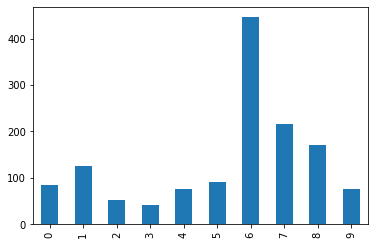

In [11]:
wday_off['avg_time'].head(10).plot(kind='bar')

In [12]:
wday_off['avg_time'].iloc[2097]

487.8948417280001

In [13]:
wday_off_data = wday_off.iloc[:,9:-1]

In [14]:
wday_off_data

Data1       Data2       Data3       Data4       Data5       Data6  \
0      89.587892   89.587911   89.587872   89.587949   89.587796   89.588103   
1     121.986947  121.986947  121.986947  121.986947  121.986947  121.986947   
2      41.285580   41.304056   41.267120   41.341058   41.193446   41.489733   
3      37.796143   37.796143   37.796143   37.796143   37.796143   37.796143   
4      60.548947   60.548947   60.548947   60.548947   60.548947   60.548947   
...          ...         ...         ...         ...         ...         ...   
5938   15.136227   21.047709   40.687163   18.374817   18.598035   30.906595   
5939   40.644760   39.590819   40.393416   40.369257   40.417604   87.431863   
5940   50.246073   50.246073   50.246073   50.246073   50.246073   50.246073   
5941   36.935304   33.306219   37.656066   43.470737   32.411114   33.199605   
5942   26.720084   26.715246   26.981895   34.148515   26.249392   32.200579   

           Data7       Data8       Data9      Data10  ...      Data41  \
0      89.587489   89.588717   89.586260   89.591175  ...   73.957197   
1     121.986948  121.986947  121.986948  121.986945  ...  113.506571   
2      40.901361   42.095280   39.773298   44.705187  ...   59.448387   
3      37.796143   37.796143   37.796143   37.796143  ...   38.472874   
4      60.548947   60.548947   60.548947   60.548947  ...   80.810511   
...          ...         ...         ...         ...  ...         ...   
5938   22.455091   16.746485   23.017850   23.148149  ...   18.137848   
5939   40.722412   43.042589   42.322098   51.953344  ...   47.036515   
5940   50.246073   22.638021   50.246073   50.246073  ...   37.986764   
5941   37.907736   37.572658   41.753448   62.509381  ...   49.169831   
5942   26.324337   27.834261   31.512728   30.654473  ...   33.190697   

          Data42      Data43      Data44      Data45      Data46      Data47  \
0      88.184778   72.003206   88.184778   73.852526   75.069991   72.673921   
1     113.506571  140.895778  142.619070  139.213634  146.195291  132.868412   
2      59.448387   59.448387   59.448387   44.218780   46.230804   45.202414   
3      46.950858   50.244426   49.761663   51.894196   60.764919   50.244426   
4      80.810511   76.872377   77.360119   76.872377   75.819331   75.222755   
...          ...         ...         ...         ...         ...         ...   
5938   21.428572   21.783739   20.197487   16.406892   20.856508   26.785715   
5939   43.083732   48.099051   43.433164   50.507828   49.743827   56.310399   
5940   39.523523   39.523523   37.986764   37.986764   37.986764   37.986764   
5941   40.066719   40.262253   40.262253   40.262253   40.262253   40.513892   
5942   32.782575   33.609110   26.854658   27.798857   35.847975   27.421728   

          Data48      Data49      Data50  
0      77.629445   77.629445   83.310242  
1     162.493618  162.493618  209.120481  
2      43.339978   43.774969   45.202414  
3      46.755229   32.152593   32.152593  
4      75.222755   75.222755   74.794745  
...          ...         ...         ...  
5938   27.444883   19.788919   19.788919  
5939   42.064937   40.425000   38.736879  
5940   37.986764   37.986764   44.496309  
5941   36.142025   38.186879   38.186879  
5942   26.417045   73.175390   73.175390  

[5943 rows x 50 columns]

In [15]:
np.array(wday_off_data.iloc[0])

array([ 89.58789169,  89.58791089,  89.58787247,  89.58794928,
        89.58779569,  89.58810286,  89.58748852,  89.58871721,
        89.58625985,  89.59117473,  89.58134548,  89.60100616,
        89.56169345,  89.64035338,  89.48317141,  89.79808855,
        89.17045533,  90.4346197 ,  87.94114664,  93.07361825,
        83.34514412, 105.3733363 ,  68.93446258,  68.93446258,
        68.93446258,  76.48783506,  88.18477793,  88.18477793,
        88.18477793,  88.18477793,  88.18477793,  88.18477793,
        88.18477793,  81.64855085,  82.6697939 ,  88.18477793,
        88.18477793,  88.18477793,  88.18477793,  88.18477793,
        73.95719666,  88.18477793,  72.0032063 ,  88.18477793,
        73.85252649,  75.06999066,  72.6739211 ,  77.62944454,
        77.62944454,  83.31024246])

In [16]:
# # define input sequence
# 
# # reshape input into [samples, timesteps, features]
# n_in = len(sequence)
# sequence = sequence.reshape((1, n_in, 1))
# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
# model.add(RepeatVector(n_in))
# model.add(LSTM(100, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(1)))
# model.compile(optimizer='adam', loss='mse')
# # fit model
# model.fit(sequence, sequence, epochs=300, verbose=0)
# plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')
# # demonstrate recreation
# y_pred = model.predict(sequence, verbose=0)
# print(y_pred[0,:,0])

In [17]:
# (118,50,50)

In [18]:
X = np.array(wday_off_data)
timesteps = X.shape[0]
n_features = 50
X = X.reshape(timesteps,1, n_features)

In [19]:
X.shape

(5943, 1, 50)

In [20]:
Xt = X/1000

In [21]:
# model = Sequential([                                   
#       tf.keras.layers.LSTM(filters = 128,kernel_size = (11,11,1),strides = (4,4,1), padding='valid',input_shape = (227,227,10,1),activation='tanh'),
#       tf.keras.layers.LSTM(filters = 64, kernel_size = (5,5,1), strides = (2,2,1), padding='valid', activation='tanh'),
#       tf.keras.layers.RepeatVector(filters=64, kernel_size=(3,3), strides = 1, padding = 'same', dropout=0.4, recurrent_dropout=0.3, return_sequences = True),
#       tf.keras.layers.ConvLSTM2D(filters=32,kernel_size=(3,3), strides=1,padding='same',dropout=0.3,return_sequences=True),
#       tf.keras.layers.ConvLSTM2D(filters = 64, kernel_size=(3,3),strides = 1,return_sequences = True,padding='same',dropout=0.5),
#       tf.keras.layers.Conv3DTranspose(filters = 128,kernel_size=(5,5,1),strides=(2,2,1),padding = 'valid',activation = 'tanh'),
#       tf.keras.layers.Conv3DTranspose(filters = 1,kernel_size = (11,11,1),strides = (4,4,1),padding = 'valid',activation = 'tanh')
# ])

In [22]:
model = Sequential([
        tf.keras.layers.Dense(48, activation='relu', input_shape=(1,n_features)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16,activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(48, activation='relu'),
        tf.keras.layers.Dense(n_features)
])
model.compile(optimizer='adam', loss='mse')

In [23]:
# model.fit(Xt, Xt, epochs=150)
# model.save('dense_model.h5')

In [24]:
model = load_model('dense_model.h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 48)             2448      
_________________________________________________________________
dense_1 (Dense)              (None, 1, 32)             1568      
_________________________________________________________________
dense_2 (Dense)              (None, 1, 16)             528       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 32)             544       
_________________________________________________________________
dense_4 (Dense)              (None, 1, 48)             1584      
_________________________________________________________________
dense_5 (Dense)              (None, 1, 50)             2450      
Total params: 9,122
Trainable params: 9,122
Non-trainable params: 0
______________________________________________________

In [26]:
layer_outputs=[layer.output for layer in model.layers[:4]]
activation_model=Model(inputs=model.input,outputs=layer_outputs)
activations=activation_model.predict(X)
bottleneck_activation=activations[2]

In [57]:
bottleneck_activation.shape

(5943, 1, 16)

In [27]:
bottleneck_activation

array([[[116.08291  , 123.6224   ,  85.287445 , ...,  86.41619  ,
           0.       ,   0.       ]],

       [[159.55902  , 132.38165  ,  84.351204 , ..., 145.79445  ,
           0.       ,   0.       ]],

       [[ 79.96836  ,  85.38207  ,  82.91069  , ...,  20.583807 ,
           0.       ,   0.       ]],

       ...,

       [[ 40.333332 ,  70.56958  ,  23.340073 , ...,  54.89797  ,
           0.       ,   0.       ]],

       [[ 59.759495 ,  64.38941  ,  47.38097  , ...,  28.701305 ,
           0.       ,   0.       ]],

       [[ 41.041813 ,  61.611794 ,   1.6812401, ...,  28.81473  ,
           0.       ,   0.       ]]], dtype=float32)

In [28]:
# demonstrate reconstruction
yhat = model.predict(Xt, verbose=0)
print('---Predicted---')
print(np.round(yhat*1000,3))
print('---Actual---')
print(np.round(X, 3))

---Predicted---
[[[ 88.754  89.031  88.011 ...  78.736  77.445  78.478]]

 [[119.675 118.924 121.599 ... 179.012 167.406 192.22 ]]

 [[ 42.51   42.024  39.46  ...  45.217  45.512  41.702]]

 ...

 [[ 47.851  50.496  45.404 ...  40.799  39.527  46.128]]

 [[ 38.942  37.375  36.788 ...  39.518  37.699  37.826]]

 [[ 27.625  28.028  26.368 ...  50.817  49.767  67.086]]]
---Actual---
[[[ 89.588  89.588  89.588 ...  77.629  77.629  83.31 ]]

 [[121.987 121.987 121.987 ... 162.494 162.494 209.12 ]]

 [[ 41.286  41.304  41.267 ...  43.34   43.775  45.202]]

 ...

 [[ 50.246  50.246  50.246 ...  37.987  37.987  44.496]]

 [[ 36.935  33.306  37.656 ...  36.142  38.187  38.187]]

 [[ 26.72   26.715  26.982 ...  26.417  73.175  73.175]]]


##  wday_peak

In [29]:
wday_peak_data = wday_peak.iloc[:,9:-1]

In [30]:
wday_peak_data

Data1       Data2       Data3       Data4       Data5       Data6  \
0      93.401342   93.401342   93.401342   93.401342   93.401342   95.007096   
1     151.747838  147.336946  152.978226  153.254360  151.573682  136.646323   
2      67.420164   80.116823   74.343437   80.116823   77.389245   39.249506   
3      45.788582   45.788582   58.698806   83.532916   83.532916   83.532916   
4     147.692628  144.502112  151.027215  128.931735  108.101780  108.101780   
...          ...         ...         ...         ...         ...         ...   
5938   52.763821   59.389143   47.468357   39.893619   38.143676   37.815128   
5939   46.294512   91.958308   77.986595   64.668166   84.305884   62.641386   
5940   56.052186   80.161812   80.161812   41.490520   80.161812   80.161812   
5941   90.660458   90.660458   55.344485   51.616903   38.893337   51.616903   
5942   30.555424   42.505259   36.911156   40.748067   26.230723   40.021229   

           Data7       Data8       Data9      Data10  ...      Data41  \
0      93.401342  119.443359  104.829202  111.660133  ...   74.129457   
1     156.647445  156.647445  156.647445  156.647445  ...  167.600790   
2      39.249506   53.507106   45.282539   49.052461  ...   87.069450   
3     113.728936   96.319786  104.302913  100.152518  ...  101.498789   
4     108.101780  113.271663  120.875186  118.960873  ...  100.583743   
...          ...         ...         ...         ...  ...         ...   
5938   34.798076   51.369865   34.145233   80.071178  ...   55.705607   
5939   60.984450   71.438305   61.734396   53.846252  ...   60.276729   
5940   80.161812   74.569128   69.705924   46.315714  ...   40.460221   
5941   53.906219   53.906219   57.410991   48.996393  ...   43.607284   
5942   40.783505   42.347149   40.617177   36.553245  ...   38.440104   

          Data42      Data43      Data44      Data45      Data46      Data47  \
0      74.119060   74.124259   74.121659   74.122959   74.122309   74.122634   
1     167.600853  167.600822  167.600822  167.600822  119.919372  139.806425   
2     111.902846   96.288095   52.718381   68.133314   59.442741   63.492023   
3     101.498789  101.498789  101.498789  101.498789  101.498789  101.498789   
4     100.579643  100.581693  100.580668  100.581180  100.580924  100.581052   
...          ...         ...         ...         ...         ...         ...   
5938   39.874337   26.533020   34.653467   33.088237   49.019610   29.128908   
5939   60.247962   46.632986   57.014459   48.911158   68.353526   67.157295   
5940   41.194952   38.596428   41.851548   25.890772   45.706296   51.717298   
5941   43.780314   41.070049   59.704684   45.837757   45.251119   46.915967   
5942   33.582969   24.718764   30.784972   32.294568   21.796925   30.081889   

          Data48      Data49      Data50  
0      74.122472   74.122553   74.122512  
1     129.101529  134.240903  131.621066  
2      61.400693   62.428849   61.910503  
3     101.498789  101.498789  101.498789  
4     100.580988  100.581020  100.581004  
...          ...         ...         ...  
5938   51.369865   42.789225   52.050476  
5939   71.559377   76.311361   79.627289  
5940   37.030627   45.773216   37.198610  
5941   46.068507   46.488375   46.277488  
5942   30.395931   43.578314   32.109798  

[5943 rows x 50 columns]

In [31]:
X1 = np.array(wday_peak_data)
timesteps1 = X1.shape[0]
n_features1 = 50
X1 = X1.reshape(timesteps1,1, n_features1)

In [32]:
Xt1 = X1/1000

In [33]:
yhat1 = model.predict(Xt1, verbose=0)
print('---Predicted---')
print(np.round(yhat1*1000,3))
print('---Actual---')
print(np.round(X1, 3))

---Predicted---
[[[ 98.008  95.473  94.034 ...  84.983  73.505  63.973]]

 [[149.381 145.939 148.416 ... 141.288 134.698 118.796]]

 [[ 67.183  72.557  61.409 ...  58.262  75.642  55.863]]

 ...

 [[ 68.347  72.479  67.635 ...  38.217  39.082  43.497]]

 [[ 64.906  69.317  61.386 ...  46.048  46.829  46.646]]

 [[ 40.248  41.615  37.107 ...  34.966  34.639  37.152]]]
---Actual---
[[[ 93.401  93.401  93.401 ...  74.122  74.123  74.123]]

 [[151.748 147.337 152.978 ... 129.102 134.241 131.621]]

 [[ 67.42   80.117  74.343 ...  61.401  62.429  61.911]]

 ...

 [[ 56.052  80.162  80.162 ...  37.031  45.773  37.199]]

 [[ 90.66   90.66   55.344 ...  46.069  46.488  46.277]]

 [[ 30.555  42.505  36.911 ...  30.396  43.578  32.11 ]]]


##  wend_off

In [34]:
wend_off_data = wend_off.iloc[:,9:-1]

In [35]:
wend_off_data

Data1       Data2       Data3       Data4       Data5       Data6  \
0      83.310242   77.629445   77.629445   72.673921   75.069991   73.852526   
1     209.120481  162.493618  162.493618  132.868412  146.195291  139.213634   
2      45.202414   43.774969   43.339978   45.202414   46.230804   44.218780   
3      32.152593   32.152593   46.755229   50.244426   60.764919   51.894196   
4      74.794745   75.222755   75.222755   75.222755   75.819331   76.872377   
...          ...         ...         ...         ...         ...         ...   
5938   19.788919   19.788919   27.444883   26.785715   20.856508   16.406892   
5939   38.736879   40.425000   42.064937   56.310399   49.743827   50.507828   
5940   44.496309   37.986764   37.986764   37.986764   37.986764   37.986764   
5941   38.186879   38.186879   36.142025   40.513892   40.262253   40.262253   
5942   73.175390   73.175390   26.417045   27.421728   35.847975   27.798857   

           Data7       Data8       Data9      Data10  ...      Data41  \
0      88.184778   72.003206   88.184778   73.957197  ...   89.591175   
1     142.619070  140.895778  113.506571  113.506571  ...  121.986945   
2      59.448387   59.448387   59.448387   59.448387  ...   44.705187   
3      49.761663   50.244426   46.950858   38.472874  ...   37.796143   
4      77.360119   76.872377   80.810511   80.810511  ...   60.548947   
...          ...         ...         ...         ...  ...         ...   
5938   20.197487   21.783739   21.428572   18.137848  ...   23.148149   
5939   43.433164   48.099051   43.083732   47.036515  ...   51.953344   
5940   37.986764   39.523523   39.523523   37.986764  ...   50.246073   
5941   40.262253   40.262253   40.066719   49.169831  ...   62.509381   
5942   26.854658   33.609110   32.782575   33.190697  ...   30.654473   

          Data42      Data43      Data44      Data45      Data46      Data47  \
0      89.588717   89.587489   89.588103   89.587796   89.587872   89.587911   
1     121.986947  121.986948  121.986947  121.986947  121.986947  121.986947   
2      42.095280   40.901361   41.489733   41.193446   41.267120   41.304056   
3      37.796143   37.796143   37.796143   37.796143   37.796143   37.796143   
4      60.548947   60.548947   60.548947   60.548947   60.548947   60.548947   
...          ...         ...         ...         ...         ...         ...   
5938   16.746485   22.455091   30.906595   18.598035   40.687163   21.047709   
5939   43.042589   40.722412   87.431863   40.417604   40.393416   39.590819   
5940   22.638021   50.246073   50.246073   50.246073   50.246073   50.246073   
5941   37.572658   37.907736   33.199605   32.411114   37.656066   33.306219   
5942   27.834261   26.324337   32.200579   26.249392   26.981895   26.715246   

          Data48      Data49      Data50  
0      89.587892   89.587901   89.587896  
1     121.986947  121.986947  121.986947  
2      41.285580   41.294816   41.290197  
3      37.796143   37.796143   37.796143  
4      60.548947   60.548947   56.386816  
...          ...         ...         ...  
5938   15.136227   20.053477   27.154237  
5939   40.644760   45.598327   42.603589  
5940   50.246073   51.335151   50.784774  
5941   36.935304   37.656066   33.314242  
5942   26.720084   26.717665   27.729621  

[5943 rows x 50 columns]

In [36]:
X2 = np.array(wend_off_data)
timesteps2 = X2.shape[0]
n_features2 = 50
X2 = X2.reshape(timesteps2,1, n_features2)

In [37]:
Xt2 = X2 / 1000

In [38]:
yhat2 = model.predict(Xt2, verbose=0)
print('---Predicted---')
print(np.round(yhat2*1000,3))
print('---Actual---')
print(np.round(X2, 3))

---Predicted---
[[[ 77.943  75.859  76.823 ...  93.104  90.353  91.603]]

 [[157.891 161.941 155.613 ... 130.203 122.061 118.374]]

 [[ 46.106  45.502  45.407 ...  39.792  41.537  43.941]]

 ...

 [[ 40.132  40.053  37.884 ...  48.704  51.198  54.401]]

 [[ 39.639  41.569  37.682 ...  34.08   34.167  38.883]]

 [[ 45.894  48.451  41.767 ...  27.495  27.629  27.034]]]
---Actual---
[[[ 83.31   77.629  77.629 ...  89.588  89.588  89.588]]

 [[209.12  162.494 162.494 ... 121.987 121.987 121.987]]

 [[ 45.202  43.775  43.34  ...  41.286  41.295  41.29 ]]

 ...

 [[ 44.496  37.987  37.987 ...  50.246  51.335  50.785]]

 [[ 38.187  38.187  36.142 ...  36.935  37.656  33.314]]

 [[ 73.175  73.175  26.417 ...  26.72   26.718  27.73 ]]]


##  wend_peak

In [39]:
wend_peak_data = wend_peak.iloc[:,9:-1]

In [40]:
wend_peak_data

Data1       Data2       Data3       Data4       Data5       Data6  \
0      78.799405   74.650979   83.436025   78.799405   81.051459   79.909568   
1     173.981384  173.981384  173.981384  170.018353  205.576066  406.882981   
2      35.494392   29.632249   30.580195   30.098760   30.337568   53.869784   
3      51.160737   51.160737   87.666055   80.890104   74.051397   87.211827   
4     129.828903  129.828903  128.245624  129.032407  130.311539  128.245624   
...          ...         ...         ...         ...         ...         ...   
5938   37.267082   30.303032   69.659446   42.432817   42.182229   25.619130   
5939   58.112267   54.875934   49.187392   55.909077   71.875835   64.966043   
5940   60.150277   60.150277   54.163387   56.533647   60.150277   60.150277   
5941   46.356778   45.015436   46.356778   76.037804   49.444872   45.015436   
5942   33.959849   33.959849   34.825681   39.978749   41.214822   39.978749   

           Data7       Data8       Data9      Data10  ...      Data41  \
0      80.476463   80.192014   80.262938   80.298446  ...  339.689653   
1     406.882981  406.882981  406.882981  406.882981  ...  175.419247   
2      31.846807   30.247572  117.439195  117.439195  ...   44.870178   
3      80.825366   99.011074   92.145342   50.698441  ...  110.212400   
4     122.565748  120.690220  265.559120  265.559120  ...  139.842303   
...          ...         ...         ...         ...  ...         ...   
5938   46.972862   38.233338   31.098827   58.685449  ...   87.890629   
5939   62.468670   49.850368   58.675054   67.481231  ...   54.190838   
5940   56.027073   51.177584   46.470616   48.466411  ...   45.767261   
5941   56.244883   50.840963   42.739930   48.060966  ...   37.067750   
5942   34.275461   30.078209   42.984145   29.645876  ...   30.205075   

          Data42      Data43      Data44      Data45      Data46      Data47  \
0     339.689592  339.689561  339.689576  339.689569  339.689573  339.689572   
1     174.638841  174.251237  174.444824  174.347976  174.396387  174.384281   
2      45.164097   45.312504   45.238179   45.275311   45.256737   45.261379   
3     110.212400   66.137063  107.896683  107.087237  108.809238   62.805532   
4     123.364534  116.500825  119.834478  119.834478  119.834478  115.210311   
...          ...         ...         ...         ...         ...         ...   
5938   50.223217   51.369865   28.195490   20.818877   58.593753   59.794991   
5939   56.831938   50.889594   52.108131   53.153443   66.850746   41.083233   
5940   45.946487   45.946487   60.941728   52.392274   56.344533   55.301601   
5941   37.815592   39.234184   40.906378   38.484440   31.834120   33.271494   
5942   30.882931   33.091689   39.767518   38.417080   22.190371   30.296572   

          Data48      Data49      Data50  
0     339.689571  339.689571  339.689571  
1     174.378230  174.381256  174.380499  
2      45.263701   45.261379   41.089326  
3     174.423654  102.377641   64.489972  
4      95.427778  110.929759  122.362015  
...          ...         ...         ...  
5938   42.313119   28.517112   42.016809  
5939   60.007819   63.524246   52.711752  
5940   54.794481   55.046873   54.983557  
5941   39.960244   53.242076   44.398786  
5942   26.145445   29.452481   31.952816  

[5943 rows x 50 columns]

In [41]:
X3 = np.array(wend_peak_data)
timesteps3 = X3.shape[0]
n_features3 = 50
X3 = X3.reshape(timesteps3,1, n_features3)

In [42]:
Xt3 = X3 / 1000

In [43]:
yhat3 = model.predict(Xt3, verbose=0)
print('---Predicted---')
print(np.round(yhat3*1000, 3))
print('---Actual---')
print(np.round(X3, 3))

---Predicted---
[[[114.222  94.687 108.384 ... 355.409 316.578 320.499]]

 [[220.228 193.356 257.439 ... 162.11  181.676 149.505]]

 [[ 33.692  28.764  36.107 ...  51.458  43.074  48.101]]

 ...

 [[ 59.306  62.548  56.724 ...  53.731  55.149  56.351]]

 [[ 53.078  54.693  50.996 ...  46.87   42.802  49.233]]

 [[ 37.456  38.279  35.398 ...  31.915  28.616  30.337]]]
---Actual---
[[[ 78.799  74.651  83.436 ... 339.69  339.69  339.69 ]]

 [[173.981 173.981 173.981 ... 174.378 174.381 174.38 ]]

 [[ 35.494  29.632  30.58  ...  45.264  45.261  41.089]]

 ...

 [[ 60.15   60.15   54.163 ...  54.794  55.047  54.984]]

 [[ 46.357  45.015  46.357 ...  39.96   53.242  44.399]]

 [[ 33.96   33.96   34.826 ...  26.145  29.452  31.953]]]


In [56]:
np.mean(abs(X[-1] - yhat[-1]))

31.819910873146842

In [53]:
np.mean(abs(X1[-1]-yhat1[-1]*1000))

5.580994787363868

In [52]:
np.mean(abs(X2[-1]-yhat2[-1]*1000))

4.685898763554004

In [51]:
np.mean(abs(X3[-1]-yhat3[-1]*1000))

6.033374283442969

### Feature vectors generated

In [60]:
bottleneck_activation

array([[[116.08291  , 123.6224   ,  85.287445 , ...,  86.41619  ,
           0.       ,   0.       ]],

       [[159.55902  , 132.38165  ,  84.351204 , ..., 145.79445  ,
           0.       ,   0.       ]],

       [[ 79.96836  ,  85.38207  ,  82.91069  , ...,  20.583807 ,
           0.       ,   0.       ]],

       ...,

       [[ 40.333332 ,  70.56958  ,  23.340073 , ...,  54.89797  ,
           0.       ,   0.       ]],

       [[ 59.759495 ,  64.38941  ,  47.38097  , ...,  28.701305 ,
           0.       ,   0.       ]],

       [[ 41.041813 ,  61.611794 ,   1.6812401, ...,  28.81473  ,
           0.       ,   0.       ]]], dtype=float32)

In [69]:
bottleneck_activation = bottleneck_activation.reshape(-1,16)

In [74]:
feature_vectors = pd.DataFrame(bottleneck_activation,columns=wday_off_data.columns[:16])

In [75]:
feature_vectors

Data1       Data2       Data3       Data4       Data5       Data6  \
0     116.082909  123.622398   85.287445  149.549911  174.133942  188.084885   
1     159.559021  132.381653   84.351204  219.202988  197.407440  333.639679   
2      79.968361   85.382072   82.910690   99.203796  116.550484  119.644218   
3      44.305367   35.493378   56.044086   87.022240   87.019447   76.934547   
4     119.960312  113.504059  111.679352  132.575348  148.718277  186.764053   
...          ...         ...         ...         ...         ...         ...   
5938   30.393410   23.199553   15.879178   42.399460   38.844337   48.568913   
5939   54.055328   71.285126   52.779961   88.048149  107.290245  106.328407   
5940   40.333332   70.569580   23.340073   72.328934  109.610283   90.649696   
5941   59.759495   64.389412   47.380970   89.560692  104.454933   89.645668   
5942   41.041813   61.611794    1.681240   57.905613   43.561924  107.774307   

           Data7       Data8  Data9  Data10  Data11  Data12     Data13  \
0       9.545237  147.277481    0.0     0.0     0.0     0.0  79.887703   
1     120.090324  218.795212    0.0     0.0     0.0     0.0  68.866356   
2       0.000000   77.781624    0.0     0.0     0.0     0.0  23.115873   
3      12.407438   49.449409    0.0     0.0     0.0     0.0  48.313087   
4      10.403971  104.110809    0.0     0.0     0.0     0.0  37.981537   
...          ...         ...    ...     ...     ...     ...        ...   
5938    6.120677   39.423615    0.0     0.0     0.0     0.0  20.139940   
5939    9.251759   72.109489    0.0     0.0     0.0     0.0  49.936356   
5940   14.924143   76.440002    0.0     0.0     0.0     0.0  28.096336   
5941    3.077206   56.068260    0.0     0.0     0.0     0.0  34.335976   
5942   50.766102   59.250950    0.0     0.0     0.0     0.0   0.000000   

          Data14  Data15  Data16  
0      86.416191     0.0     0.0  
1     145.794449     0.0     0.0  
2      20.583807     0.0     0.0  
3      40.203106     0.0     0.0  
4      47.968140     0.0     0.0  
...          ...     ...     ...  
5938   21.463089     0.0     0.0  
5939   41.903996     0.0     0.0  
5940   54.897968     0.0     0.0  
5941   28.701305     0.0     0.0  
5942   28.814730     0.0     0.0  

[5943 rows x 16 columns]